# PCA

In [112]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA   
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

## Milk Dataset

In [38]:
milk = pd.read_csv("./Datasets/milk.csv", index_col=0)
milk.head()

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


In [39]:
milk.shape

(25, 5)

In [40]:
scaler = StandardScaler().set_output(transform='pandas')
scaled_data = scaler.fit_transform(milk)
scaled_data.head()
prcomp = PCA().set_output(transform='pandas')
pca_data = prcomp.fit_transform(scaled_data)
pca_data.shape

(25, 5)

`Variation Explained`

In [41]:
prcomp.explained_variance_

array([4.0404117 , 0.92437238, 0.13429088, 0.1026886 , 0.00656977])

`Proportion of variance explained by every PC column`

In [42]:
prcomp.explained_variance_ratio_

array([0.77575905, 0.1774795 , 0.02578385, 0.01971621, 0.0012614 ])

`Percentage(%) of variation explained by every PC column`

In [43]:
prcomp.explained_variance_ratio_*100

array([77.57590469, 17.74794969,  2.57838496,  1.97162103,  0.12613963])

## Nutrient Dataset

In [44]:
nutrient = pd.read_csv("./Datasets/nutrient.csv", index_col=0)
nutrient.head()

,energy,protein,fat,calcium,iron
Food_Item,,,,,
BEEF BRAISED,340,20,28,9,2.6
HAMBURGER,245,21,17,9,2.7
BEEF ROAST,420,15,39,7,2.0
BEEF STEAK,375,19,32,9,2.6
BEEF CANNED,180,22,10,17,3.7


In [45]:
scaler = StandardScaler().set_output(transform='pandas')
scaled_data = scaler.fit_transform(nutrient)
prcomp = PCA().set_output(transform='pandas')
pca_data = prcomp.fit_transform(scaled_data)

In [46]:
prcomp.explained_variance_

array([2.28079741e+00, 1.18996245e+00, 8.80317810e-01, 8.39566765e-01,
       1.66325132e-03])

In [47]:
prcomp.explained_variance_ratio_


array([4.39264687e-01, 2.29177954e-01, 1.69542689e-01, 1.61694340e-01,
       3.20329884e-04])

In [48]:
prcomp.explained_variance_ratio_*100

array([4.39264687e+01, 2.29177954e+01, 1.69542689e+01, 1.61694340e+01,
       3.20329884e-02])

## HR Dataset

In [49]:
hr = pd.read_csv("./Cases/human-resources-analytics/HR_comma_sep.csv")
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low


In [50]:
X = hr.drop("left", axis=1)
y = hr['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24, stratify=y)

In [51]:
ohe = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')
ct = make_column_transformer((ohe, make_column_selector(dtype_include=object)),("passthrough", make_column_selector(dtype_exclude=object)),verbose_feature_names_out=False).set_output(transform='pandas')
X_trn_ohe = ct.fit_transform(X_train)
X_tst_ohe = ct.transform(X_test)

In [52]:
scaler = StandardScaler().set_output(transform='pandas')
X_trn_scaled = scaler.fit_transform(X_trn_ohe)
prcomp = PCA().set_output(transform='pandas')
X_trn_pca = prcomp.fit_transform(X_trn_scaled)

In [53]:
np.cumsum(prcomp.explained_variance_ratio_*100)

array([ 10.49274822,  20.61810645,  28.00287374,  34.90795476,
        41.58416764,  47.83896476,  53.96462833,  59.87934422,
        65.7664398 ,  71.62051654,  77.38201333,  82.78058733,
        87.56208845,  92.12810707,  95.6150546 ,  98.67240524,
        99.47267483, 100.        ])

Text(0, 0.5, 'Variations Explained')

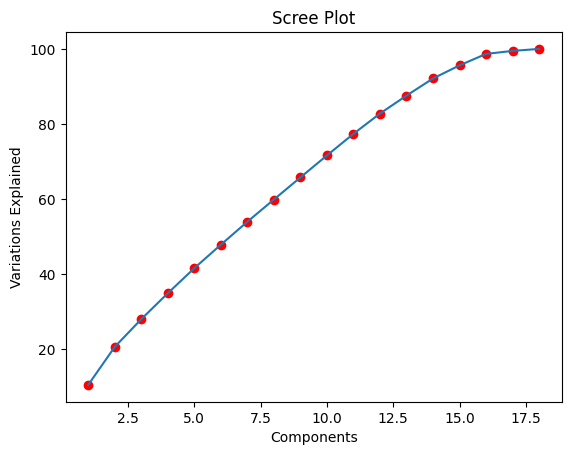

In [58]:
plt.scatter(np.arange(1,prcomp.n_components_ +1),np.cumsum(prcomp.explained_variance_ratio_*100), c='red' )
plt.plot(np.arange(1,prcomp.n_components_ +1), np.cumsum(prcomp.explained_variance_ratio_*100))
plt.title("Scree Plot")
plt.xlabel("Components")
plt.ylabel("Variations Explained")


In [85]:
lr = LogisticRegression()
selected_trn_pca = X_trn_pca.iloc[:,:16]
lr.fit(selected_trn_pca, y_train)

LogisticRegression()

In [86]:
X_tst_scl = scaler.transform(X_tst_ohe)
X_tst_pca = prcomp.transform(X_tst_scl)

In [87]:
selected_tst_pca = X_tst_pca.iloc[:,:16]
y_pred = lr.predict(selected_tst_pca)

In [88]:
accuracy_score(y_test, y_pred)

0.7719493220715714

`pipeline`

In [89]:
scaler = StandardScaler()
prcomp = PCA(n_components=16)
lr = LogisticRegression(random_state=24)
pipe = Pipeline([('OHE',ct),('SCL',scaler),('PCA', prcomp),('LR',lr)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [90]:
accuracy_score(y_test, y_pred)

0.7719493220715714

`GridSearchCV`

In [102]:
pipe = Pipeline([('OHE',ct),('SCL',scaler),('PCA', prcomp),('LR',lr)])

In [103]:
pipe.get_params()

{'memory': None,
 'steps': [('OHE',
   ColumnTransformer(transformers=[('onehotencoder',
                                    OneHotEncoder(drop='first',
                                                  sparse_output=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x00000287E02D22F0>),
                                   ('passthrough', 'passthrough',
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x00000287E02D0DC0>)],
                     verbose_feature_names_out=False)),
  ('SCL', StandardScaler()),
  ('PCA', PCA(n_components=16)),
  ('LR', LogisticRegression(random_state=24))],
 'verbose': False,
 'OHE': ColumnTransformer(transformers=[('onehotencoder',
                                  OneHotEncoder(drop='first',
                                                sparse_output=False),
                                  <sklearn.compose._column_transformer.make_colum

In [104]:
scaler = StandardScaler()
lr = LogisticRegression()
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
pipe = Pipeline([('OHE',ct),('SCL',scaler),('PCA', prcomp),('LR',lr)])
params = {'PCA__n_components':[13,14,15,16],'LR__C':[0.001,0.1,0.5,1,1.5,2,5] }
gcv = GridSearchCV(pipe, param_grid=params, cv=kf, scoring='accuracy', n_jobs=-1)
gcv.fit(X_train,y_train)
print(gcv.best_params_, gcv.best_score_)


{'LR__C': 0.001, 'PCA__n_components': 13} 0.7863954263935207


## BankRuptcy dataset

In [105]:
brupt = pd.read_csv("./Cases/Company Bankruptcy/data.csv")
brupt.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,..

In [106]:
X = brupt.drop('Bankrupt?', axis=1)
y = brupt['Bankrupt?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24, stratify=y)

In [107]:
scaler = StandardScaler().set_output(transform='pandas')
scaled_data = scaler.fit_transform(X_train)
prcomp = PCA().set_output(transform='pandas')
pca_data = prcomp.fit_transform(scaled_data)

In [108]:
np.cumsum(prcomp.explained_variance_ratio_*100)


array([ 13.49872123,  20.70181049,  25.78336365,  30.59571834,
        34.95471128,  38.13590001,  41.17499936,  44.08852596,
        46.58157777,  48.70890839,  50.82062774,  52.74583076,
        54.58857969,  56.28927169,  57.89405282,  59.46980047,
        60.96346999,  62.30189613,  63.60534617,  64.85144877,
        66.07148183,  67.2594981 ,  68.42552636,  69.56783766,
        70.67544098,  71.77185054,  72.8617561 ,  73.93683761,
        74.99830418,  76.0503991 ,  77.09734028,  78.1355894 ,
        79.16492601,  80.17401964,  81.17154257,  82.16229437,
        83.1257438 ,  84.08509046,  85.03453003,  85.96235698,
        86.87682371,  87.78109012,  88.67043554,  89.52476679,
        90.35219787,  91.15544446,  91.91566828,  92.63472993,
        93.33637017,  93.96918828,  94.53768938,  95.08647893,
        95.60504889,  96.08437732,  96.53484522,  96.94280004,
        97.32140762,  97.65683331,  97.97933826,  98.22745924,
        98.47152106,  98.69068015,  98.89775962,  99.07

Text(0, 0.5, 'Variations Explained')

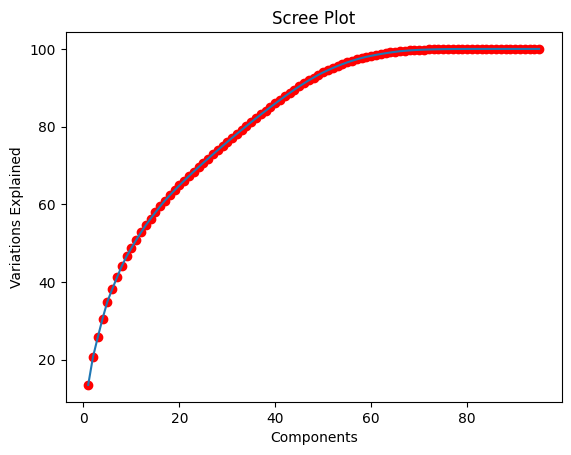

In [109]:
plt.scatter(np.arange(1,prcomp.n_components_ +1),np.cumsum(prcomp.explained_variance_ratio_*100), c='red' )
plt.plot(np.arange(1,prcomp.n_components_ +1), np.cumsum(prcomp.explained_variance_ratio_*100))
plt.title("Scree Plot")
plt.xlabel("Components")
plt.ylabel("Variations Explained")

In [119]:
scaler = StandardScaler()
prcomp = PCA(n_components=70)
lr = LogisticRegression(random_state=24)
pipe = Pipeline([('SCL',scaler),('PCA', prcomp),('LR',lr)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
f1_score(y_test, y_pred, pos_label=1)

0.20224719101123595

In [111]:
scaler = StandardScaler()
lr = LogisticRegression()
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
pipe = Pipeline([('SCL',scaler),('PCA', prcomp),('LR',lr)])
params = {'PCA__n_components':[8,32,40,48,54,62],'LR__C':[0.001,0.1,0.5,1,1.5,2,5] }
gcv = GridSearchCV(pipe, param_grid=params, cv=kf, scoring='f1', n_jobs=-1)
gcv.fit(X_train,y_train)
print(gcv.best_params_, gcv.best_score_)

{'LR__C': 1.5, 'PCA__n_components': 62} 0.34213059136698154


# Kernel PCA

In [123]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA, KernelPCA
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [124]:
milk = pd.read_csv("./Datasets/milk.csv", index_col=0)
milk.head()

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


In [125]:
scaler = StandardScaler().set_output(transform='pandas')
scaled_data = scaler.fit_transform(milk)
scaled_data.head()
prcomp = KernelPCA().set_output(transform='pandas')
pca_data = prcomp.fit_transform(scaled_data)
pca_data.shape

(25, 5)

In [126]:
pca_data

,kernelpca0,kernelpca1,kernelpca2,kernelpca3,kernelpca4
Animal,,,,,
HORSE,-2.435175,-0.231478,0.330150,0.307664,-0.048184
ORANGUTAN,-2.258736,-0.693148,0.029035,-0.081057,0.000532
MONKEY,-2.335861,-0.663328,0.101257,0.247997,-0.010109
DONKEY,-2.318677,-0.273815,0.109881,-0.092873,0.006769
HIPPO,-2.060294,-1.019199,-0.762436,-0.510091,-0.029382
CAMEL,-1.301536,0.137303,-0.198742,-0.282160,0.014668
BISON,-1.282742,0.622667,0.253785,0.065148,0.044486
BUFFALO,-0.505068,0.088235,0.008383,0.133774,-0.083806
GUINEA PIG,0.255502,0.287373,-0.881857,-0.013100,0.016484
